Dataset Columns: Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

Top 10 Actual Prices: [901000.4882338208, 494537.5115454976, 949404.2006657254, 1040389.0481357794, 794010.0167336396, 724033.5604571347, 998439.2371139774, 909713.435000704, 792681.5184200833, 947490.777477816]
Top 10 Predicted Prices: [850830.9950129351, 508452.9248157041, 989301.2456458645, 1025788.840460434, 756982.8651940126, 764366.5748930563, 1005554.0364658546, 903529.4719941911, 794251.1443399799, 887188.0823136113]

Model Performance (Full Test Set):
R² Score: 0.9868694920685783
Mean Squared Error: 846377534.2209022


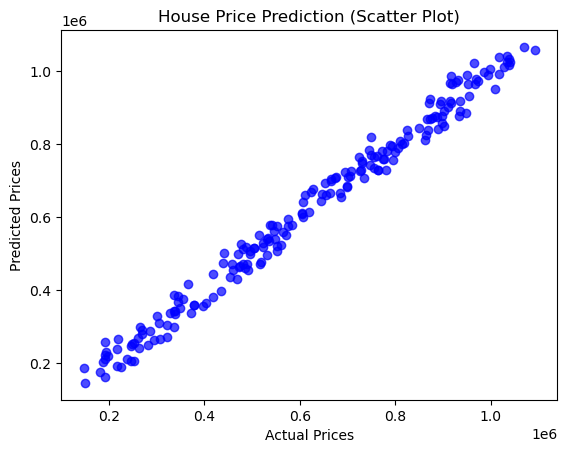

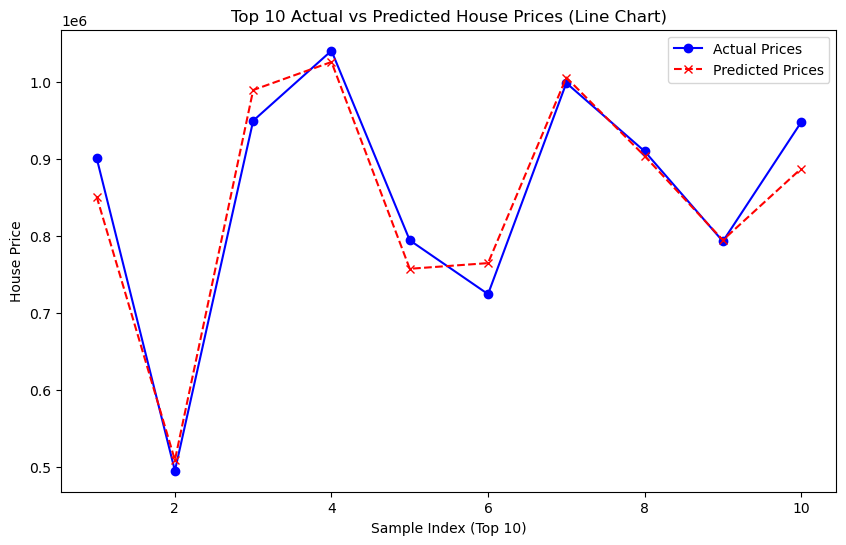

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("house_price.csv")   
print("Dataset Columns:", data.columns)

X = data[["Square_Footage", "Num_Bedrooms", "Num_Bathrooms"]]   
y = data["House_Price"]                                         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_test_top10 = y_test[:10]
pred_top10 = predictions[:10]

print("\nTop 10 Actual Prices:", list(y_test_top10))
print("Top 10 Predicted Prices:", list(pred_top10))

print("\nModel Performance (Full Test Set):")
print("R² Score:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("House Price Prediction (Scatter Plot)")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), y_test_top10.values, label="Actual Prices", color="blue", marker="o")
plt.plot(range(1, 11), pred_top10, label="Predicted Prices", color="red", linestyle="--", marker="x")
plt.xlabel("Sample Index (Top 10)")
plt.ylabel("House Price")
plt.title("Top 10 Actual vs Predicted House Prices (Line Chart)")
plt.legend()
plt.show()

